# EDA

#### Reading our data located in data.csv file 

In [1]:
import pandas as pd 


#
df=pd.read_csv('data.csv',header=None,delimiter=';' )
df.columns=['CRIM','ZN', 'INDUS','CHAS', 'NOX' ,'RM' ,'AGE', 'DIS' ,'RAD' ,'TAX', 'PYRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PYRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Let's summary our data using the describe method of a dataframe.

In [2]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PYRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Let's plot our data to see how it is distributed

In [3]:
import matplotlib.pyplot as plt
df['MEDV'].hist()
df.plot.scatter(x='RM',y='MEDV')

#### Let's use sns.pairplot to visualize relationships between our independent variables

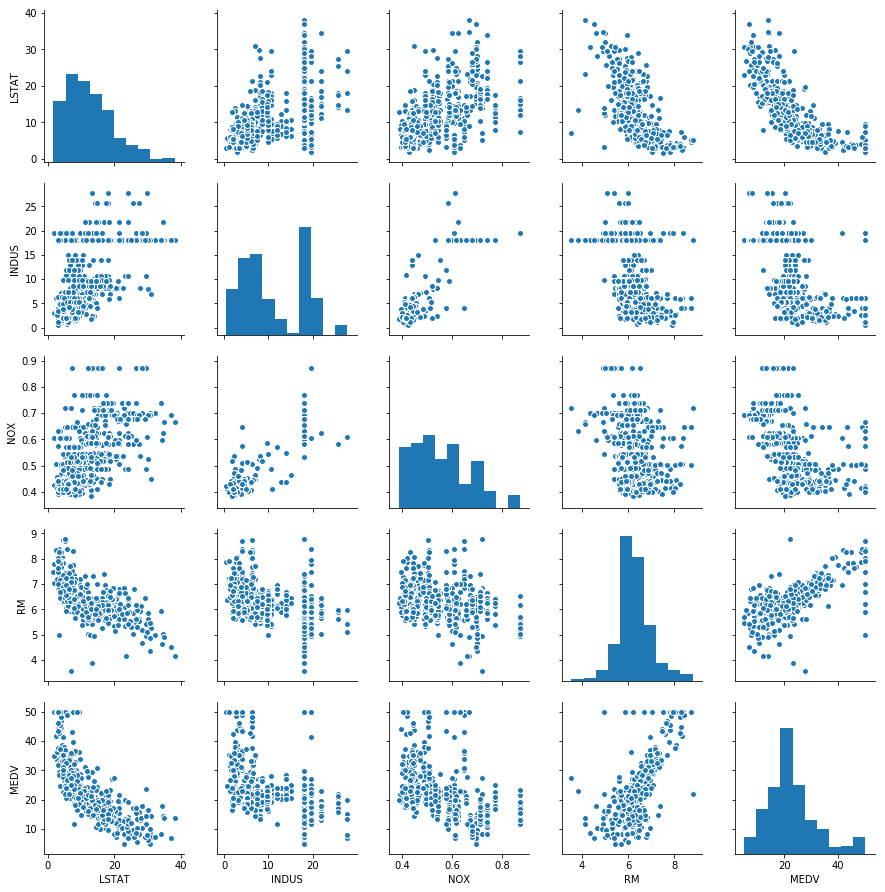

In [4]:
import seaborn as sns
cols1=['LSTAT', 'INDUS', 'NOX' ,'RM','MEDV']
#cols2=['AGE', 'DIS' ,'RAD' , 'PYRATIO','MDEV']
sns.pairplot(df[cols1],size=2.5)


In [ ]:
sns.pairplot(data, x_vars=cols1.pop(-1),y_vars=MEDV

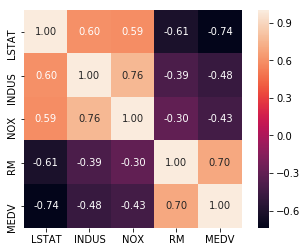

In [5]:
import numpy as np
cm=np.corrcoef(df[cols1].values.T)
hm=sns.heatmap(cm,
              cbar=True,
              annot=True,
              square=True,
              fmt='.2f',
              yticklabels=cols1,
              xticklabels=cols1
              )
#help (sns.heatmap)

# Creating our LinearRegressionGD class

In [11]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta=eta
        self.n_iter=n_iter
    def fit(self,X,y):
        self.w_= np.zeros(1+X.shape[1])
        self.cost_=[]
        for i in range(self.n_iter):
            output=self.net_input(X)
            errors=(y-output)
            self.w_[1:]+=self.eta*X.T.dot(errors)
            self.w_[0]+= self.eta*errors.sum()
            cost=(errors**2).sum()/2.0
            self.cost_.append(cost)
           #print(self.cost_)
        return self 
    def net_input(self,X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self,X):
        return self.net_input(X)


# Prediction

#### Predicting the target variable (y=df['MEDV']) using only the number of rooms (X=df[['RM']])


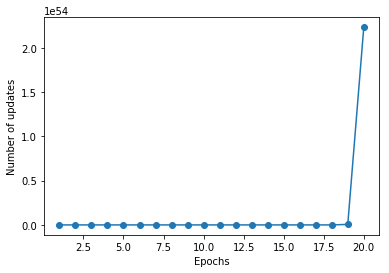

In [12]:
from sklearn.preprocessing import StandardScaler
X=df[['RM']].values
y=df['MEDV'].values

sc_x=StandardScaler()
sc_y=StandardScaler()

X_std=sc_x.fit_transform(X)
Y_std=sc_y.fit_transform(y[:,np.newaxis]).flatten()
lr=LinearRegressionGD()
lr.fit(X,y)
plt.plot(range(1,lr.n_iter+1),lr.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

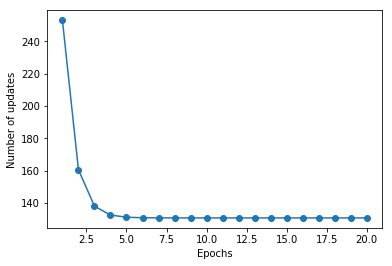

In [13]:
lr.fit(X_std,Y_std)
plt.plot(range(1,lr.n_iter+1),lr.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()